In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
import operator

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# # The clothing-store data set contains information about 28,799 customers in the following 51 fields:

# Customer ID: unique, encrypted customer identification HHKEY
# Zip code ZIP_CODE
# Number of purchase visits FRE
# Total net sales MON
# Average amount spent per visit AVRG
# Amount spent at each of four different franchises (four variables) AMSPEND, PSSPEND, CCSPEND, AXSPEND
# Amount spent in the past month, the past three months, and the past six months OMONSPEND, TMONSPEND, SMONSPEND
# Amount spent the same period last year PREVPD
# Gross margin percentage GMP
# Number of marketing promotions on file PROMOS
# Number of days the customer has been on file DAYS
# Number of days between purchases FREDAYS
# Markdown percentage on customer purchases MARKDOWN
# Number of different product classes purchased CLASSES
# Number of coupons used by the customer COUPONS
# Total number of individual items purchased by the customer STYLES
# Number of stores the customer shopped at STORES
# Number of promotions mailed in the past year MAILED
# Number of promotions responded to in the past year RESPONDED
# Promotion response rate for the past year RESPONSERATE
# Product uniformity (low score = diverse spending patterns) HI
# Lifetime average time between visits LTFREDAYS
# Microvision lifestyle cluster type CLUSTYPE
# Percent of returns PERCRET
# Flag: credit card user CC_CARD
# Flag: valid phone number on file VALPHON
# Flag: Web shopper WEB
# 15 variables providing the percentages spent by the customer on specific classes of clothing, including sweaters, knit tops, knit dresses, blouses, jackets, career pants, casual pants, shirts, dresses, suits, outerwear, jewelry, fashion, legwear, and the collectibles line; (P*, PJACKETS for example) also a variable showing the brand of choice (encrypted)
# Target variable: response to promotion RESP...this is our response or y.
# These data are based on a direct mail marketing campaign conducted last year. We want to use this information to develop classification models for this year’s marketing campaign.

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 6C28-BA93

 Directory of C:\Users\Mo.Pei\Desktop\data2\SAS_2018\Direct_Marketing

02/09/2018  06:24 PM    <DIR>          .
02/09/2018  06:24 PM    <DIR>          ..
02/08/2018  10:13 AM    <DIR>          .ipynb_checkpoints
10/23/2015  04:44 PM         7,980,833 Clothing_Store.csv
02/09/2018  06:24 PM         1,734,824 Direct_Marketing.ipynb
02/09/2018  06:11 PM            35,846 knn_compare_model.png
02/09/2018  06:21 PM            73,807 ROC.png
               4 File(s)      9,825,310 bytes
               3 Dir(s)  181,272,252,416 bytes free


In [4]:
df=pd.read_csv('Clothing_Store.csv')

In [5]:
df=df.head(7000)

In [6]:
df.HHKEY.unique().shape[0]

7000L

In [7]:
df.shape

(7000, 51)

In [8]:
df=df.drop(['HHKEY','ZIP_CODE'],axis=1)

In [9]:
df.shape

(7000, 49)

### Business profit and cost

Lets assume the amortized cost of preparing a mailing and mailing it is \$3. Lets assume additionally that the profit margin on a sale is 30% (we are a high end clothing chain).

In [10]:
prep_and_mail=3
profit_margin=0.3
print "The average of Average amount spent per visit is {} dollars.".format(df.AVRG.mean())
print "The average profit of per visit is {} dollars.".format(df.AVRG.mean()*profit_margin)

The average of Average amount spent per visit is 114.644022857 dollars.
The average profit of per visit is 34.3932068571 dollars.


### Feature Engineering & Classify categorical variables and quantatitive variables. 

In [11]:
variables={}
for v in df.columns:
    l=df[v].unique()
    variables[v]=len(l) 

In [12]:
sorted_variables = sorted(variables.items(), key=operator.itemgetter(1),reverse=True)
sorted_variables

[('MON', 5392),
 ('AVRG', 4996),
 ('CCSPEND', 4420),
 ('HI', 3923),
 ('SMONSPEND', 3808),
 ('LTFREDAY', 3510),
 ('FREDAYS', 2602),
 ('PSSPEND', 2520),
 ('TMONSPEND', 2381),
 ('PREVPD', 1221),
 ('OMONSPEND', 922),
 ('AXSPEND', 773),
 ('DAYS', 677),
 ('STORELOY', 550),
 ('AMSPEND', 376),
 ('PLEGWEAR', 373),
 ('REC', 361),
 ('PJEWELRY', 349),
 ('PERCRET', 220),
 ('PFASHION', 208),
 ('PKNIT_TOPS', 202),
 ('STYLES', 165),
 ('PKNIT_DRES', 149),
 ('PCAS_PNTS', 117),
 ('PDRESSES', 110),
 ('PSWEATERS', 109),
 ('PBLOUSES', 105),
 ('PCOLLSPND', 105),
 ('PCAR_PNTS', 101),
 ('PSHIRTS', 100),
 ('PJACKETS', 96),
 ('PSUITS', 96),
 ('POUTERWEAR', 93),
 ('MARKDOWN', 85),
 ('GMP', 85),
 ('FRE', 62),
 ('CLUSTYPE', 51),
 ('RESPONSERATE', 43),
 ('PROMOS', 36),
 ('CLASSES', 35),
 ('COUPONS', 22),
 ('STORES', 17),
 ('MAILED', 12),
 ('RESPONDED', 12),
 ('PC_CALC20', 6),
 ('VALPHON', 2),
 ('WEB', 2),
 ('RESP', 2),
 ('CC_CARD', 2)]

In [13]:
for v in df.columns:
    l=df[v].unique()
    if len(l)<5:
        print v,l

CC_CARD [0 1]
VALPHON ['N' 'Y']
WEB [0 1]
RESP [0 1]


#### Transform indicator string to numeric

In [14]:
df['VALPHON']=(df['VALPHON']=='Y')*1

In [15]:
list(df.columns[map(lambda x:str(x)[0]=='P',df.columns.values)])

['PC_CALC20',
 'PSWEATERS',
 'PKNIT_TOPS',
 'PKNIT_DRES',
 'PBLOUSES',
 'PJACKETS',
 'PCAR_PNTS',
 'PCAS_PNTS',
 'PSHIRTS',
 'PDRESSES',
 'PSUITS',
 'POUTERWEAR',
 'PJEWELRY',
 'PFASHION',
 'PLEGWEAR',
 'PCOLLSPND',
 'PSSPEND',
 'PREVPD',
 'PROMOS',
 'PERCRET']

In [16]:
df.shape

(7000, 49)

In [17]:
numerical_variable_list=[ 'MON',
 'CCSPEND',
 'AVRG',
 'SMONSPEND',
#  'ZIP_CODE',
 'HI',
 'PSSPEND',
 'TMONSPEND',
 'LTFREDAY',
 'FREDAYS',
 'PREVPD',
 'OMONSPEND',
 'AXSPEND',
#  'STORELOY',
'AMSPEND',
 'DAYS',
          'PERCRET',
     'STYLES',     
                             'MARKDOWN',
                             'GMP',
 'FRE',
'RESPONSERATE',
 'PROMOS',
 'CLASSES',
 'COUPONS',
 'STORES',
 'MAILED',
 'RESPONDED',
 'PSWEATERS',
 'PKNIT_TOPS',
 'PKNIT_DRES',
 'PBLOUSES',
 'PJACKETS',
 'PCAR_PNTS',
 'PCAS_PNTS',
 'PSHIRTS',
 'PDRESSES',
 'PSUITS',
 'POUTERWEAR',
 'PJEWELRY',
 'PFASHION',
 'PLEGWEAR',
 'PCOLLSPND',]

In [18]:
len(numerical_variable_list)

41

In [19]:
catigorical_variable_list=[
     'VALPHON',
 'WEB',
#  'RESP',
 'CC_CARD'
]

In [20]:
len(catigorical_variable_list)

3

#### Train Test Split

In [21]:
X=df[catigorical_variable_list+numerical_variable_list].values
y=df['RESP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
X_train.shape,y_train.shape

((4900L, 44L), (4900L,))

#### EDA for continuous features and indicators

In [23]:
df_train=pd.DataFrame(np.concatenate((X_train, y_train.reshape(X_train.shape[0],-1)), 
                                   axis=1),columns=catigorical_variable_list+numerical_variable_list+['RESP'])

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


In [24]:
df_train.shape

(4900, 45)

#### continuous features

C:\Anaconda2\lib\site-packages\matplotlib\figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


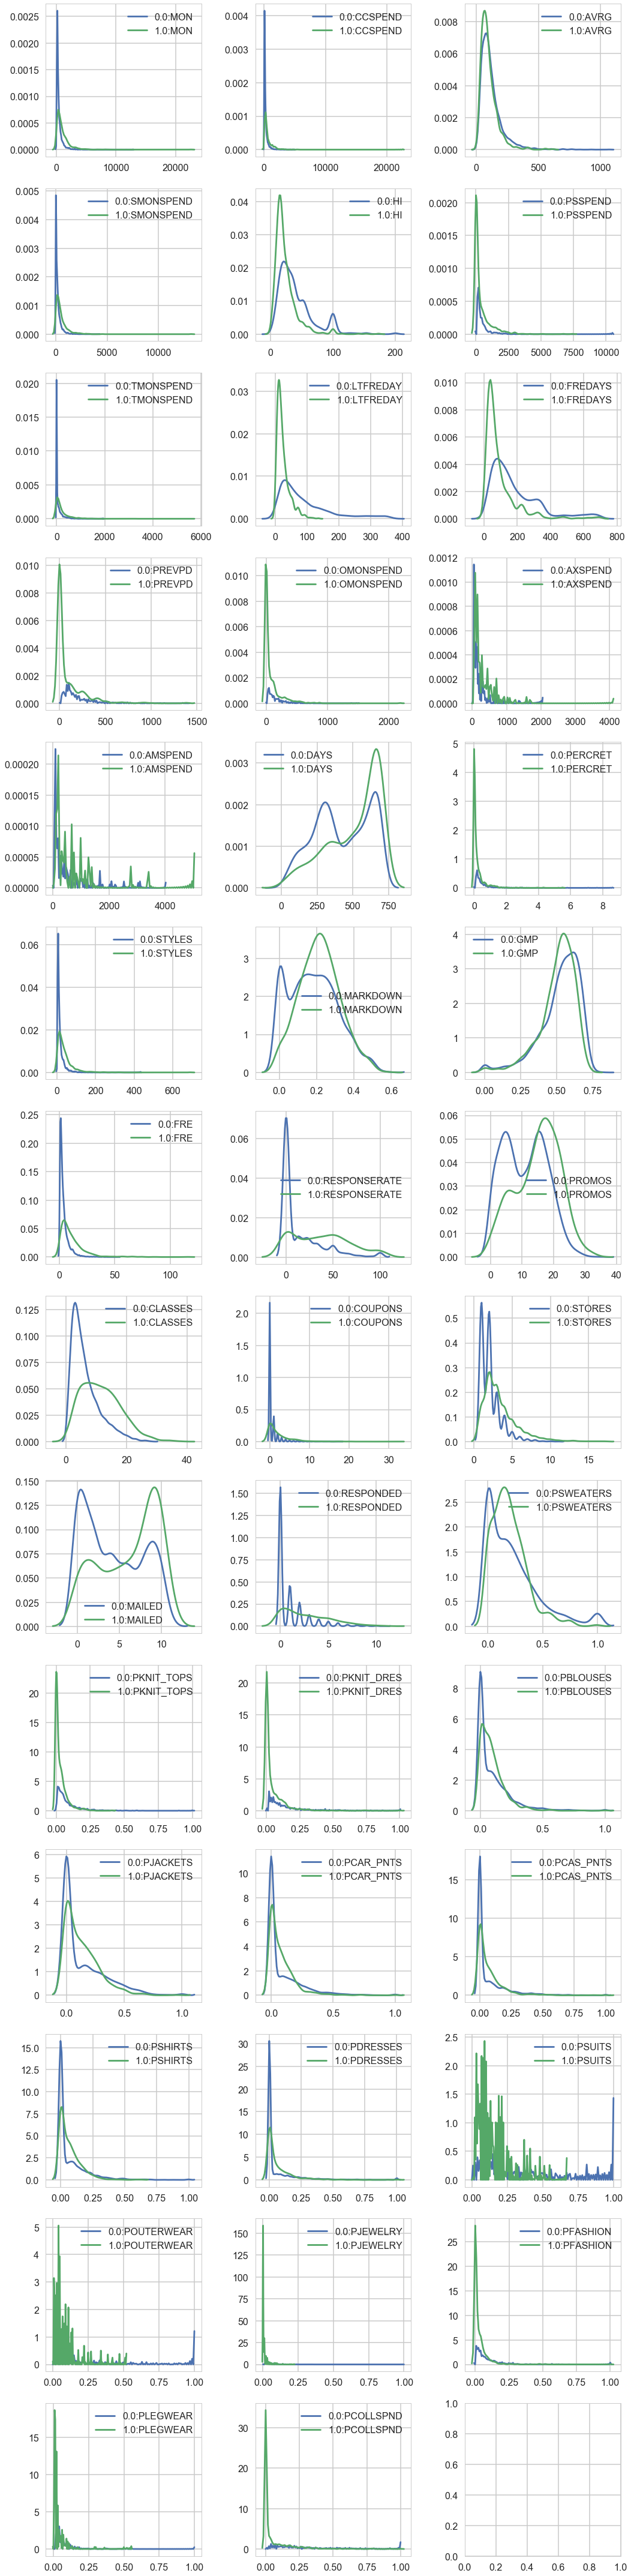

In [25]:
dfgb=df_train.groupby('RESP')
fig, axes = plt.subplots(nrows=14, ncols=3, figsize=(15, 60), 
                         tight_layout=True)
for ax, p in zip(axes.ravel(), numerical_variable_list):
    for k, v in dfgb[p]:
        sns.kdeplot(v, ax=ax, label=str(k)+":"+v.name)
# plt.savefig('Univariate Analysis Quantatitive Variable')
plt.show()

#### Categorical variables

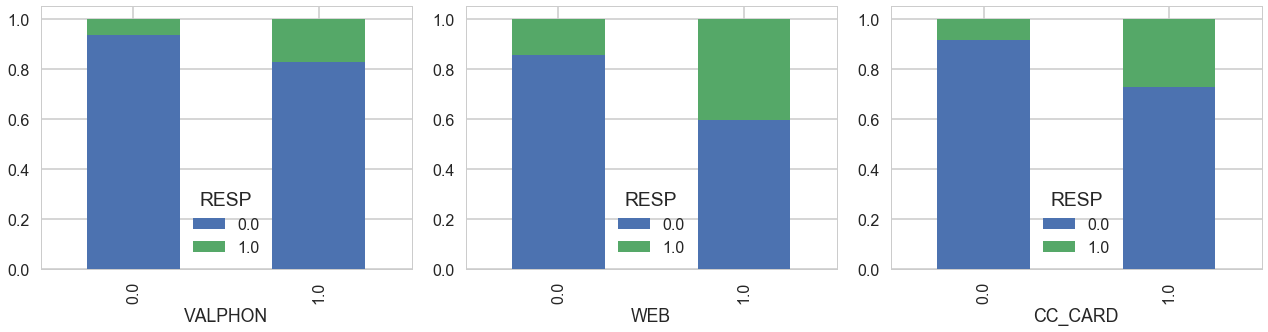

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), 
                         tight_layout=True)

for ax, p in zip(axes.ravel(), catigorical_variable_list): 
    table=pd.crosstab(df_train[p],df_train['RESP'])
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',ax=ax,stacked='True')
# plt.savefig('Univariate Analysis Categorical Variable')
plt.show()

#### Feature Selection

We can also get a notion of which features are important in the classification process by seeing how they correlate with the response. Implement some code to obtain the Pearson correlation coefficient between each of our features and the response. Do this on the training set only! Create a dataframe indexed by the features, which has columns abscorr the absolute value of the correlation and corr the value of the correlation. Sort the dataframe by abscorr, highest first, and show the top 25 features with the highest absolute correlation.

In [27]:
from scipy.stats.stats import pearsonr
correlations=[]
dftousetrain=df_train
for col in dftousetrain.columns.values:
    r=pearsonr(dftousetrain[col].values, df_train['RESP'].values)[0]
    correlations.append(dict(feature=col,corr=r, abscorr=np.abs(r)))

bpdf=pd.DataFrame(correlations).sort('abscorr', ascending=False)
bpdf.set_index(['feature'], inplace=True)
bpdf.head(15)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,abscorr,corr
feature,,
RESP,1.000000,1.000000
FRE,0.392355,0.392355
CLASSES,0.353676,0.353676
RESPONDED,0.336275,0.336275
STYLES,0.336263,0.336263
RESPONSERATE,0.331656,0.331656
COUPONS,0.310597,0.310597
LTFREDAY,0.302848,-0.302848
STORES,0.299307,0.299307


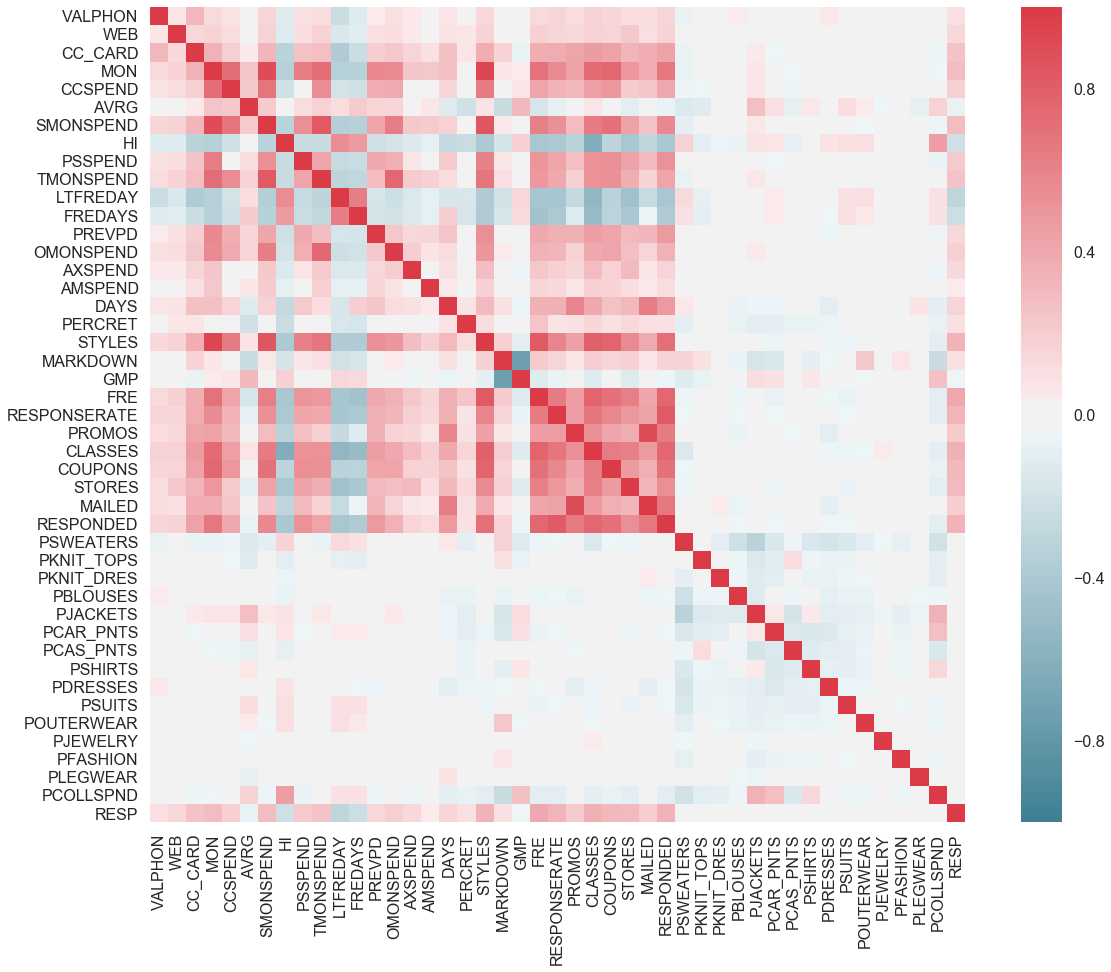

In [28]:
import seaborn as sns

f, ax = plt.subplots(figsize=(20, 15))
corr = df_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

#### Select features

### Building Models

#### Logistic regression and inference

In [29]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.314039
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                   RESP   No. Observations:                 4900
Model:                          Logit   Df Residuals:                     4856
Method:                           MLE   Df Model:                           43
Date:                Fri, 09 Feb 2018   Pseudo R-squ.:                  0.2739
Time:                        18:37:25   Log-Likelihood:                -1538.8
converged:                       True   LL-Null:                       -2119.2
                                        LLR p-value:                3.552e-215
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.0978      0.181     -0.539      0.590        -0.453     0.258
x2             0.3110      0.

In [30]:
def cv_optimize(clf, parameters, X_train, y_train, X_test, y_test, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters,  cv=n_folds)
    gs.fit(X_train, y_train)
    print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_
    clf = gs.best_estimator_
    clf=clf.fit(X_train, y_train)
    training_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(y_test, clf.predict(X_test))
    print "########################################################"
    return clf

#### Logistic Regression L1 Lass Feature importance, and L2 Ridge

In [31]:
# pd.DataFrame(X_train)

In [32]:
X_train[0][0].dtype

dtype('float64')

In [33]:
%%time
from sklearn.linear_model import LogisticRegression
logclf=LogisticRegression(penalty="l1")
c={"C": [0.001, 0.1,10.0,100.0]}
clf_l1=cv_optimize(logclf,c,X_train,y_train,X_test,y_test,score_func='f1')

BEST {'C': 100.0} 0.314280392878 [mean: 0.26140, std: 0.05521, params: {'C': 0.001}, mean: 0.29756, std: 0.05350, params: {'C': 0.1}, mean: 0.31414, std: 0.05981, params: {'C': 10.0}, mean: 0.31428, std: 0.06001, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.86
Accuracy on test data:     0.86
[[1727   29]
 [ 264   80]]
########################################################
Wall time: 5min 10s


#### Regularization

In [34]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg100.score(X_test, y_test)))
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set accuracy: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set accuracy: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set accuracy: 0.861
Test set accuracy: 0.859
Training set accuracy: 0.861
Test set accuracy: 0.859


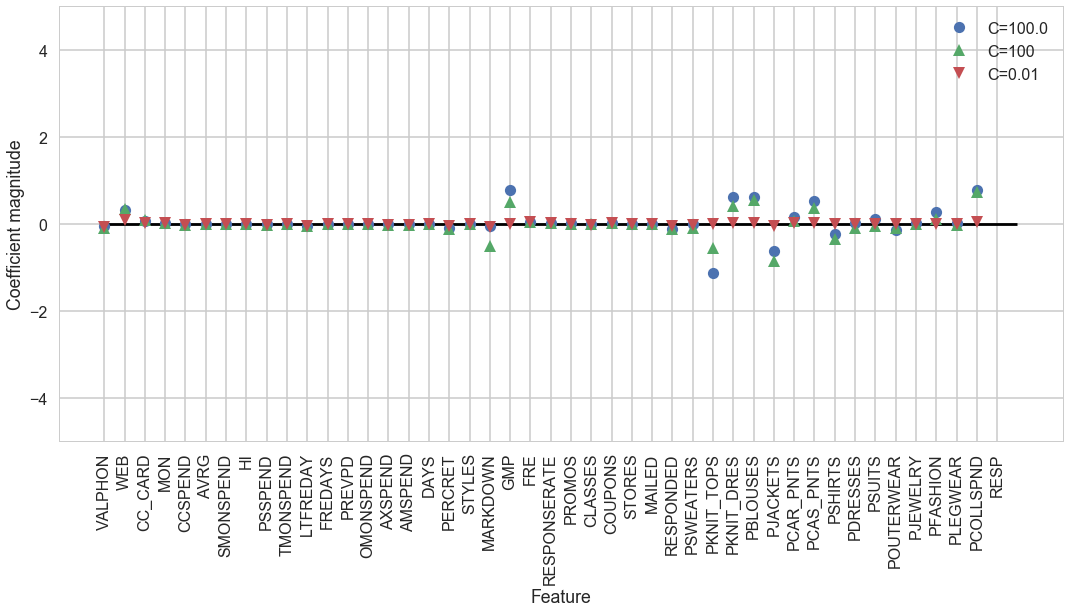

In [35]:
columns=df_train.columns
data_features = [x for i,x in enumerate(columns) if i!=8]

plt.figure(figsize=(18,8))
plt.plot(clf_l1.coef_.T, 'o', label="C={}".format(clf_l1.C))
plt.plot(logreg100.coef_.T, '^', label="C={}".format(logreg100.C))
plt.plot(logreg001.coef_.T, 'v', label="C={}".format(logreg001.C))
plt.xticks(range(df_train.shape[1]), columns, rotation=90)
plt.hlines(0, 0, df_train.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
# plt.savefig('log_coef')

In [36]:
def nonzero_lasso(clf,col):
    featuremask=(clf.coef_ !=0.0)[0]
    return pd.DataFrame(dict(feature=col, 
                             coef=clf.coef_[0], 
                             abscoef=np.abs(clf.coef_[0])))[featuremask].sort('abscoef', ascending=False)

In [37]:
df_train_columns=df_train.columns[:-1]

In [38]:
X_train.shape

(4900L, 44L)

In [39]:
df_train_columns.shape

(44L,)

In [40]:
lasso_importances=nonzero_lasso(clf_l1,df_train_columns)
lasso_importances.set_index("feature", inplace=True)
lasso_importances.head(10)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,abscoef,coef
feature,,
PKNIT_TOPS,1.140386,-1.140386
GMP,0.779090,0.779090
PCOLLSPND,0.776312,0.776312
PJACKETS,0.638618,-0.638618
PBLOUSES,0.619655,0.619655
PKNIT_DRES,0.617164,0.617164
PCAS_PNTS,0.510648,0.510648
WEB,0.308805,0.308805
PFASHION,0.274182,0.274182


### Ridge Regression L2

In [41]:
%%time
from sklearn.linear_model import LogisticRegression
logclf=LogisticRegression(penalty="l2")
c={"C": [0.0001, 0.01, 0.1, 1, 10, 100,1000]}
clf_l2=cv_optimize(logclf,c,X_train,y_train,X_test,y_test,score_func='f1')

BEST {'C': 10} 0.313958710258 [mean: 0.27954, std: 0.06039, params: {'C': 0.0001}, mean: 0.30551, std: 0.05539, params: {'C': 0.01}, mean: 0.29731, std: 0.06185, params: {'C': 0.1}, mean: 0.30706, std: 0.06553, params: {'C': 1}, mean: 0.31396, std: 0.06035, params: {'C': 10}, mean: 0.30817, std: 0.05379, params: {'C': 100}, mean: 0.31050, std: 0.06491, params: {'C': 1000}]
############# based on standard predict ################
Accuracy on training data: 0.86
Accuracy on test data:     0.86
[[1727   29]
 [ 266   78]]
########################################################
Wall time: 13.8 s


### KNN

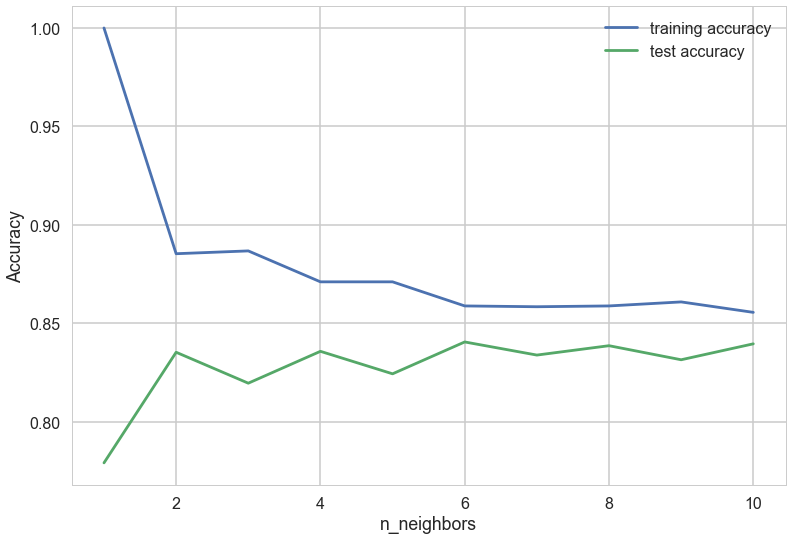

In [42]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [43]:
from sklearn.neighbors import KNeighborsClassifier
clf= KNeighborsClassifier()
parameters={'n_neighbors':range(5,6,7)}
clf_cnn=cv_optimize(clf,parameters,X_train,y_train,X_test,y_test,score_func='f1')

BEST {'n_neighbors': 5} 0.262680573724 [mean: 0.26268, std: 0.02770, params: {'n_neighbors': 5}]
############# based on standard predict ################
Accuracy on training data: 0.87
Accuracy on test data:     0.82
[[1657   99]
 [ 270   74]]
########################################################


#### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()
parameters = {"n_estimators": range(1, 10), "max_depth": [4, 5, 6, 7,8,9,10],'min_samples_leaf': [ 3, 4, 5, 6]}
clf_rf=cv_optimize(clfForest,parameters,X_train,y_train,X_test,y_test,score_func='f1')

BEST {'n_estimators': 1, 'max_depth': 6, 'min_samples_leaf': 4} 0.374858373996 [mean: 0.26189, std: 0.09612, params: {'n_estimators': 1, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.31221, std: 0.07376, params: {'n_estimators': 2, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.30274, std: 0.05621, params: {'n_estimators': 3, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.30203, std: 0.04899, params: {'n_estimators': 4, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.27588, std: 0.02213, params: {'n_estimators': 5, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.27487, std: 0.03860, params: {'n_estimators': 6, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.26933, std: 0.04551, params: {'n_estimators': 7, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.27343, std: 0.02687, params: {'n_estimators': 8, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.28705, std: 0.03178, params: {'n_estimators': 9, 'max_depth': 4, 'min_samples_leaf': 3}, mean: 0.27292, std: 0.12318, params: {'n_estima

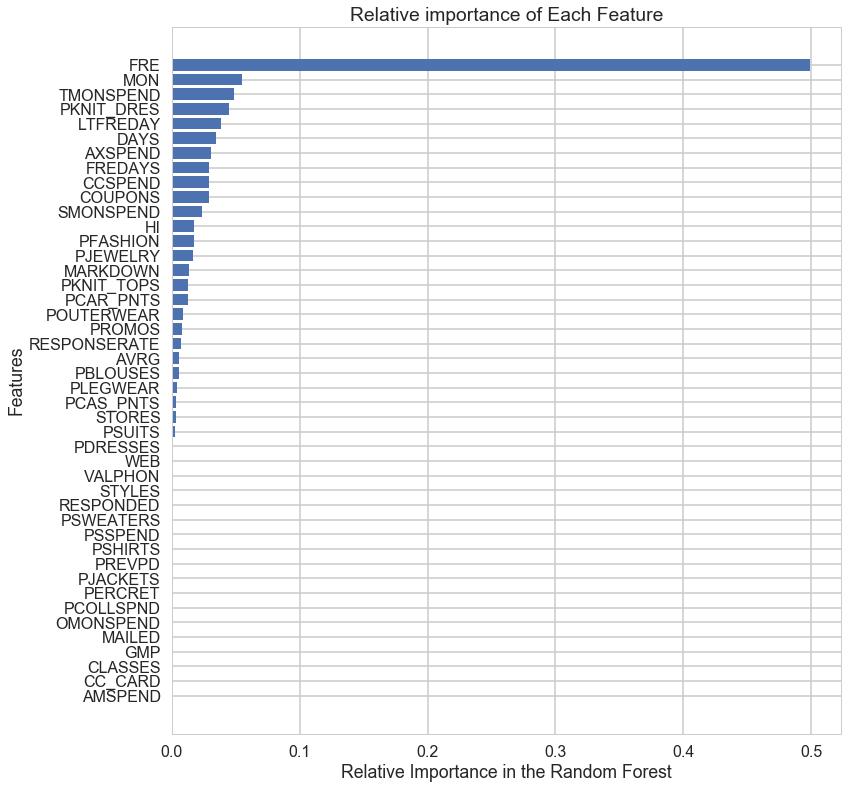

In [45]:
plt.figure(num=None, figsize=(12, 13))
importance_list = clf_rf.feature_importances_
name_list = df_train.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

#### Linear SVC

In [57]:
from sklearn.svm import LinearSVC

clfsvm=LinearSVC(loss="hinge")
c_grid={'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_svc=cv_optimize(clfsvm,c_grid,X_train,y_train,X_test,y_test,score_func='f1')

BEST {'C': 1.0} 0.370424775637 [mean: 0.31289, std: 0.09047, params: {'C': 0.001}, mean: 0.36538, std: 0.07377, params: {'C': 0.01}, mean: 0.29365, std: 0.08916, params: {'C': 0.1}, mean: 0.37042, std: 0.11264, params: {'C': 1.0}, mean: 0.23429, std: 0.14186, params: {'C': 10.0}, mean: 0.22657, std: 0.18178, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.84
Accuracy on test data:     0.83
[[1663   93]
 [ 261   83]]
########################################################


In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc = LinearSVC(loss="hinge")
# svc.fit(X_train_scaled, y_train)

clfsvm=LinearSVC(loss="hinge")
c_grid={'C':[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_svc=cv_optimize(clfsvm,c_grid,X_train_scaled,y_train,X_test_scaled,y_test,score_func='f1')

BEST {'C': 100.0} 0.128276806901 [mean: 0.00000, std: 0.00000, params: {'C': 0.001}, mean: 0.00000, std: 0.00000, params: {'C': 0.01}, mean: 0.00000, std: 0.00000, params: {'C': 0.1}, mean: 0.03775, std: 0.02586, params: {'C': 1.0}, mean: 0.01905, std: 0.03810, params: {'C': 10.0}, mean: 0.12828, std: 0.04661, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.85
Accuracy on test data:     0.85
[[1694   62]
 [ 244  100]]
########################################################


#### SVM Rbf

In [48]:
from sklearn.svm import SVC
rbf_svm= SVC()
c_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}
clf_svm_Rbf=cv_optimize(rbf_svm,c_grid,X_train_scaled,y_train,X_test_scaled,y_test,score_func='f1')

BEST {'C': 100.0} 0.130033361153 [mean: 0.00000, std: 0.00000, params: {'C': 0.001}, mean: 0.00000, std: 0.00000, params: {'C': 0.01}, mean: 0.00000, std: 0.00000, params: {'C': 0.1}, mean: 0.00000, std: 0.00000, params: {'C': 1.0}, mean: 0.03322, std: 0.02064, params: {'C': 10.0}, mean: 0.13003, std: 0.02269, params: {'C': 100.0}]
############# based on standard predict ################
Accuracy on training data: 0.85
Accuracy on test data:     0.85
[[1702   54]
 [ 251   93]]
########################################################


#### Neural Networks

In [49]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.77
Accuracy on test set: 0.73


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.949
Accuracy on test set: 0.830


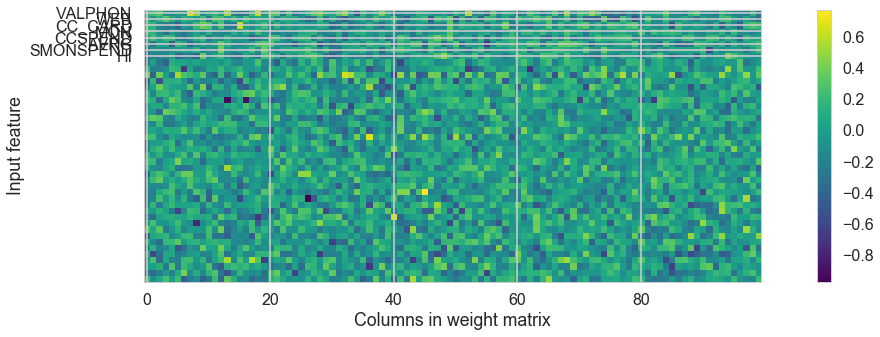

In [51]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(8), data_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

#### Model comparison ROC curve.

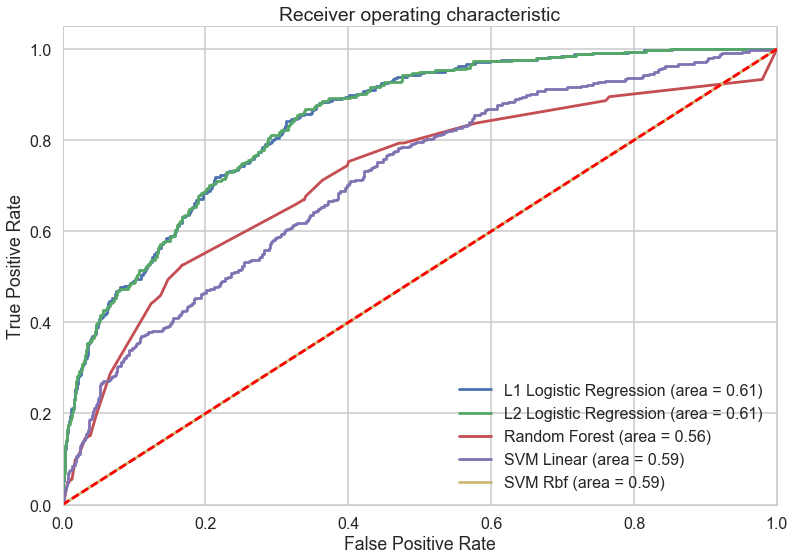

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_L1_roc_auc = roc_auc_score(y_test, clf_l1.predict(X_test))
l1fpr, l2tpr, thresholds = roc_curve(y_test, clf_l1.predict_proba(X_test)[:,1])

logit_L2_roc_auc = roc_auc_score(y_test, clf_l2.predict(X_test))
l2_fpr, l2_tpr, thresholds = roc_curve(y_test, clf_l2.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, clf_rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, clf_rf.predict_proba(X_test)[:,1])

svm_linear_roc_auc = roc_auc_score(y_test, clf_svc.predict(X_test))
svm_fpr, svm_tpr, rf_thresholds = roc_curve(y_test, clf_svc.decision_function(X_test))

clf_svm_Rbf_roc_auc = roc_auc_score(y_test, clf_svm_Rbf.predict(X_test))
svm_rbf_fpr, svm_rbf_tpr, rf_thresholds = roc_curve(y_test, clf_svm_Rbf.decision_function(X_test))

plt.figure()
plt.plot(l1fpr, l2tpr, label='L1 Logistic Regression (area = %0.2f)' % logit_L1_roc_auc)
plt.plot(l2_fpr, l2_tpr, label='L2 Logistic Regression (area = %0.2f)' % logit_L2_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(svm_fpr, svm_tpr, label='SVM Linear (area = %0.2f)' % svm_linear_roc_auc)
plt.plot(svm_rbf_fpr, svm_rbf_tpr, label='SVM Rbf (area = %0.2f)' % svm_linear_roc_auc)

# plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

### Utility and Profit analysis

Costs for True Positives, False Negatives, False Positives, and True Negatives

Lets categorize the costs for each one of these alternatives.

Lets assume the amortized cost of preparing a mailing and mailing it is \$3. Lets assume additionally that the profit margin on a sale is 30% (we are a high end clothing chain).

True Negatives cost us nothing but gain us nothing either.

In [63]:
tnc=0.0 #tnr stands for "true negative cost"

In [61]:
prep_and_mail=3
profit_margin=0.3
tpc=prep_and_mail - df.AVRG.mean()*profit_margin 
tpc

-31.39320685714187

In [62]:
fnc = df.AVRG.mean()*profit_margin
fnc

34.39320685714187

In [64]:
fpc=prep_and_mail
fpc

3

In [65]:
risk_matrix=np.array([[tnc, fpc],[fnc, tpc]])
risk_matrix

array([[  0.        ,   3.        ],
       [ 34.39320686, -31.39320686]])

#### utility matrix or profit matrix

In [72]:
u = - risk_matrix
u

array([[ -0.        ,  -3.        ],
       [-34.39320686,  31.39320686]])

In [73]:

def average_profit_pp(y, ypred, u):
    c=confusion_matrix(y,ypred)
    score=np.sum(c*u)/np.sum(c)
    return score

In [75]:
testsize = df_train.shape[0]
ypred_dste = np.zeros(testsize, dtype="int")
print confusion_matrix(y_train, ypred_dste)
dsteval=average_profit_pp(y_train, ypred_dste, u)
dsteval

[[4137    0]
 [ 763    0]]


-5.3555136391835196

In [79]:
np.sum(confusion_matrix(y_train, ypred_dste)*u)/np.sum(testsize)

-5.3555136391835196